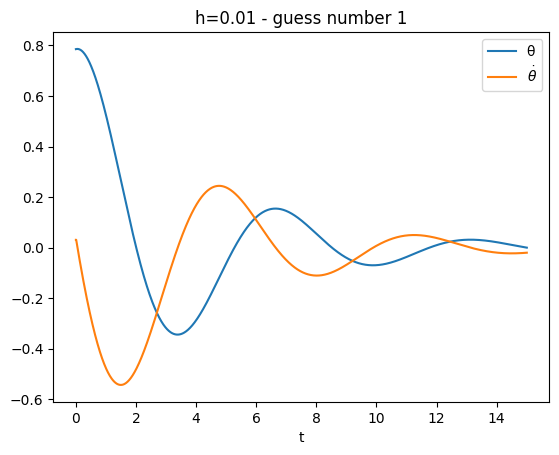

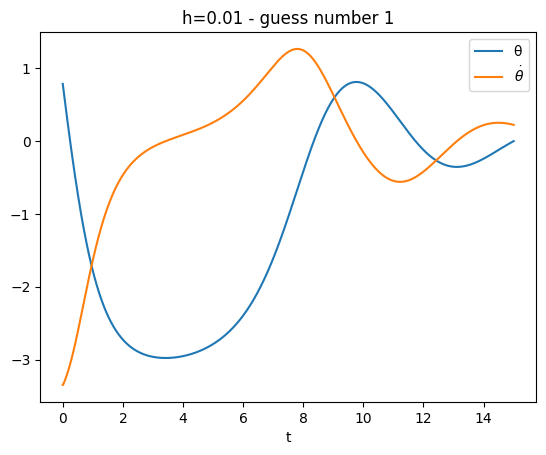

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

# parameters
h=0.01
omega=1
T0=np.pi/4
tf=15
gamma=0.5
t=np.arange(h,tf,h)
time=np.concatenate((np.array([0]),t,np.array([tf])),axis=0)
N=np.size(t)
Tol=10**-5

# Newton Raphson function
def NR(f,J,x0,h):
    n=0;
    while np.linalg.norm(f(x0))>h:
        x0=x0-csr_matrix(np.linalg.inv(J(x0)))@f(x0)
        n=n+1
    return x0,n

# Functions for each time step
f = lambda T: np.concatenate((np.array([(T[1]+T0-2*T[0])/h**2+np.sin(T[0])
                                        +gamma/(2*h)
                                        *(T[1]-T0)]),np.array(
    [(T[n]+T[n-2]-2*T[n-1])/h**2+np.sin(T[n-2])+gamma/(2*h)*
(T[n]-T[n-2])
     for n in range(2,N)]),np.array([(T[N-2]
                                      -2*T[N-1])/
                                     h**2+np.sin(T[N-1])
                                     -gamma/(2*h)*T[N-2]])),axis=0)

# Jacobian
J = lambda T:np.diag((-2/h**2+np.cos(T))*np.ones(N))+np.diag(
    (1/h**2+gamma/(2*h))*np.ones(N-1),1)+np.diag(
    (1/h**2-gamma/(2*h))*np.ones(N-1),-1)

# First guess
T_guess=T0*np.cos((t.T*np.pi)/(2*tf))
[T_guess,n]=(NR(f,J,T_guess,Tol))
T=np.concatenate((np.array([T0]),T_guess,np.array([0])),axis=0)
T_dot=np.concatenate((np.array([(T[1]-T0)/h]),
                      np.array([
                          (T[i+1]-T[i])
                          /h for i in range(0,N)]),
                      np.array([-T[-2]/h])),axis=0)
                      
fig,ax=plt.subplots()
ax.plot(time,T,label='\u03B8')
ax.plot(time,T_dot,label='$\dot{\u03B8}$')
ax.set_xlabel('t')
ax.set_title(f'h={h} - guess number 1')
ax.legend(loc='upper right')
plt.show()

# Second guess
T_guess=T0*np.sin((t.T*np.pi)/(2*tf))
[T_guess,n]=(NR(f,J,T_guess,Tol))
T=np.concatenate((np.array([T0]),T_guess,np.array([0])),axis=0)
T_dot=np.concatenate((np.array([(T[1]-T0)/h]),
                      np.array([
                          (T[i+1]-T[i])
                          /h for i in range(0,N)]),
                      np.array([-T[-2]/h])),axis=0)
                      
fig,ax=plt.subplots()
ax.plot(time,T,label='\u03B8')
ax.plot(time,T_dot,label='$\dot{\u03B8}$')
ax.set_xlabel('t')
ax.set_title(f'h={h} - guess number 2')
ax.legend(loc='upper right')
plt.show()